In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.static import DATA_DIR
from math import e

%matplotlib inline

In [10]:
df = pd.read_csv(f'{DATA_DIR}/raw_data.csv', na_values=['.', 'NaN', '9'])

In [11]:
df.head()

,enterprise_flag,record_number,num_bedrooms,num_units,affordability_level,tenant_income_ind,year,census_tract_2020,tract_income_ratio,affordability_cat,date_of_mortgage_note,purpose_of_loan,type_of_seller,federal_guarantee,tot_num_units,underserved_areas_ind
0,2,1.0,2,58.0,3.0,0,2013,3.0,1.0,8.0,2.0,3.0,1,2.0,250.0,NaN
1,2,1.0,1,50.0,2.0,0,2013,3.0,1.0,8.0,2.0,3.0,1,2.0,250.0,NaN
2,2,1.0,2,1.0,NaN,0,2013,3.0,1.0,8.0,2.0,3.0,1,2.0,250.0,NaN
3,2,1.0,2,86.0,3.0,0,2013,3.0,1.0,8.0,2.0,3.0,1,2.0,250.0,NaN
4,2,1.0,2,55.0,3.0,0,2013,3.0,1.0,8.0,2.0,3.0,1,2.0,250.0,NaN


In [12]:
df.shape

(895729, 16)

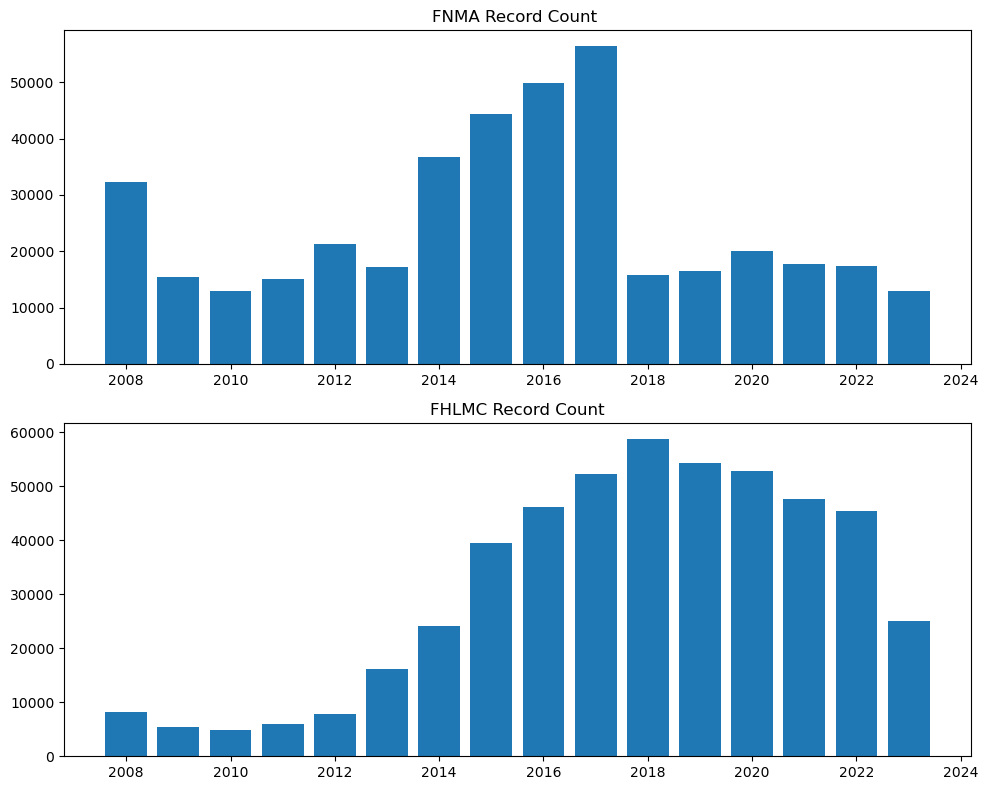

In [13]:
gb_enterprise = df.groupby('year')['enterprise_flag'].value_counts().reset_index()
fnma_count = gb_enterprise[gb_enterprise['enterprise_flag'] == 1][['year', 'count']]
fhlmc_count = gb_enterprise[gb_enterprise['enterprise_flag'] == 2][['year','count']]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
ax[0].bar(x=fnma_count['year'], height=fnma_count['count'])
ax[0].set_title(f'FNMA Record Count ')
ax[1].bar(x=fhlmc_count['year'], height=fhlmc_count['count'])
ax[1].set_title('FHLMC Record Count')
plt.tight_layout();

In [20]:
gb = df.groupby(['year', 'enterprise_flag'])['num_units'].sum().reset_index()
fnma = gb[gb['enterprise_flag'] == 1][['year', 'num_units']]
fhlmc = gb[gb['enterprise_flag'] == 2][['year', 'num_units']]

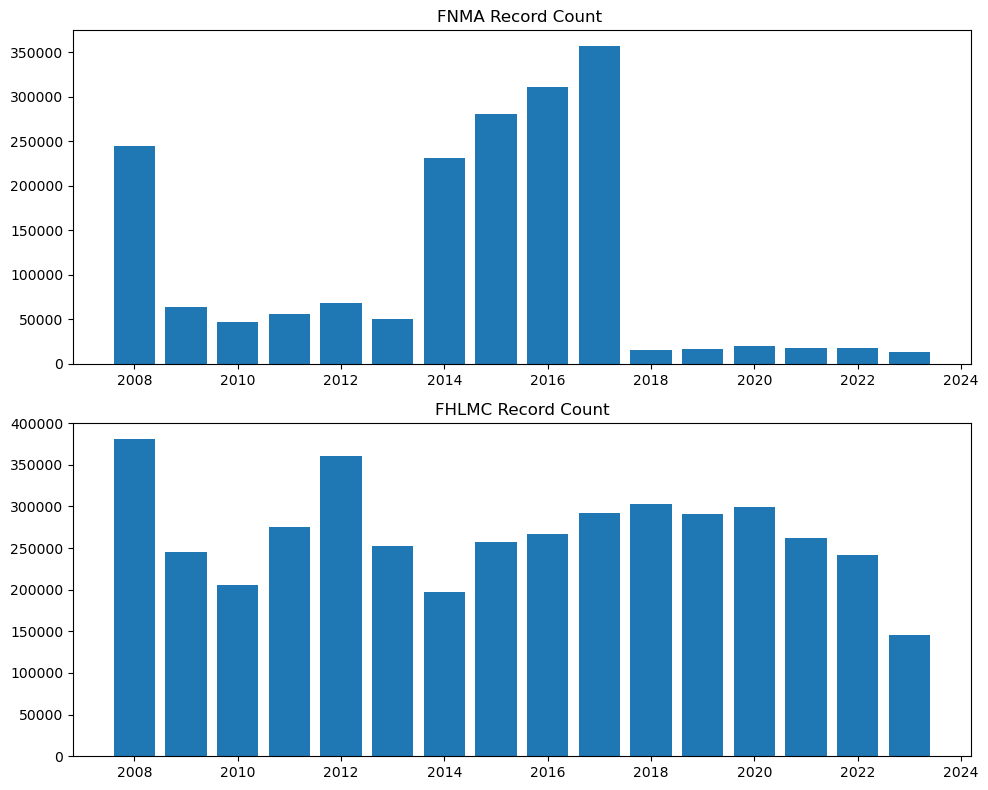

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
ax[0].bar(x=fnma['year'], height=fnma['num_units'])
ax[0].set_title(f'FNMA Record Count ')
ax[1].bar(x=fhlmc['year'], height=fhlmc['num_units'])
ax[1].set_title('FHLMC Record Count')
plt.tight_layout();9